In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

----------------------------------------------

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
drop = df[df['CREDIT_LIMIT'].isnull()].index  # credit_limit가 결측치인 열 삭제
drop

Int64Index([5203], dtype='int64')

In [7]:
df.drop(drop, inplace = True)

In [8]:
df[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [9]:
df[df['MINIMUM_PAYMENTS'].isnull()]  # minimum_payments가 결측치인 값 0으로 수정(minimum_payments==0인 값 없음)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [10]:
df['MINIMUM_PAYMENTS'] = np.where(df['MINIMUM_PAYMENTS'].isnull(), 0, df['MINIMUM_PAYMENTS'])

In [11]:
df[df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


------------------------------------------------------

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.0,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.0,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.0,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.0,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.0,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.0,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.0,0.000000,0.000000,0.222222,1.50000


In [57]:
df.nunique()

CUST_ID                             8949
BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [58]:
df[['ONEOFF_PURCHASES','MINIMUM_PAYMENTS']].T

,0,1,2,3,4,5,6,7,8,9,...,8940,8941,8942,8943,8944,8945,8946,8947,8948,8949
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.0,16.000000,0.000000,6402.630000,0.00000,661.490000,1281.600000,...,0.00000,0.000000,0.000000,20.900000,1012.73,0.000000,0.0,0.000000,0.000000,1093.250000
MINIMUM_PAYMENTS,139.509787,1072.340217,627.284787,0.0,244.791237,2407.246035,198.065894,532.03399,311.963409,100.302262,...,82.77132,861.949906,86.283101,43.473717,0.00,48.886365,0.0,82.418369,55.755628,88.288956


![columns](csv_columns.png)

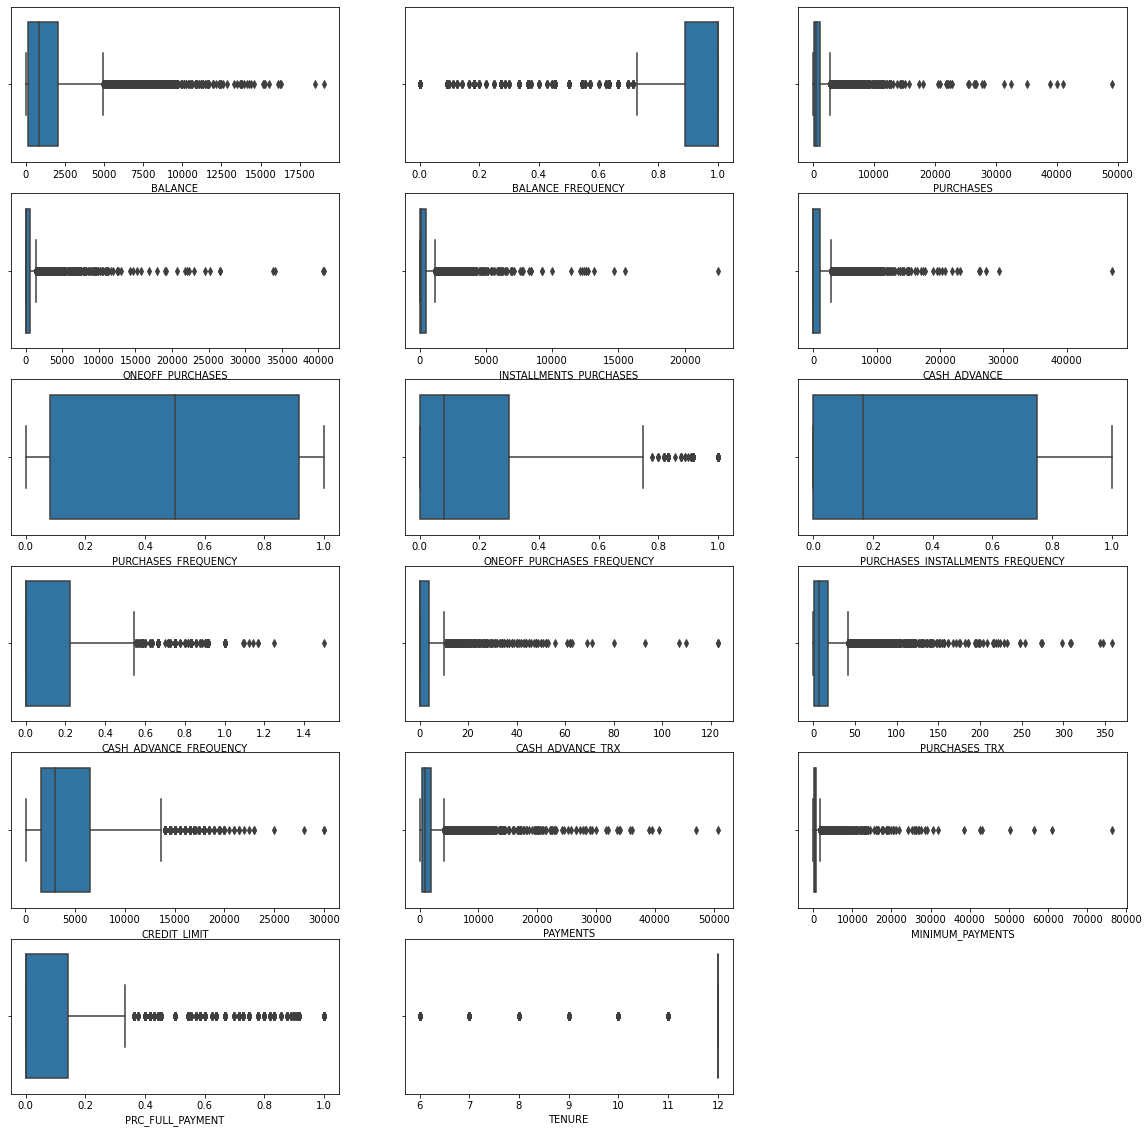

In [61]:
import warnings
warnings.filterwarnings('ignore')

n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

plt.figure(figsize=(20,20))
for i, col in enumerate( df.select_dtypes(include=[np.number]).columns):
    ax = plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(df[col], ax=ax,orient='h')
    plt.xlabel(col)
        
plt.show()

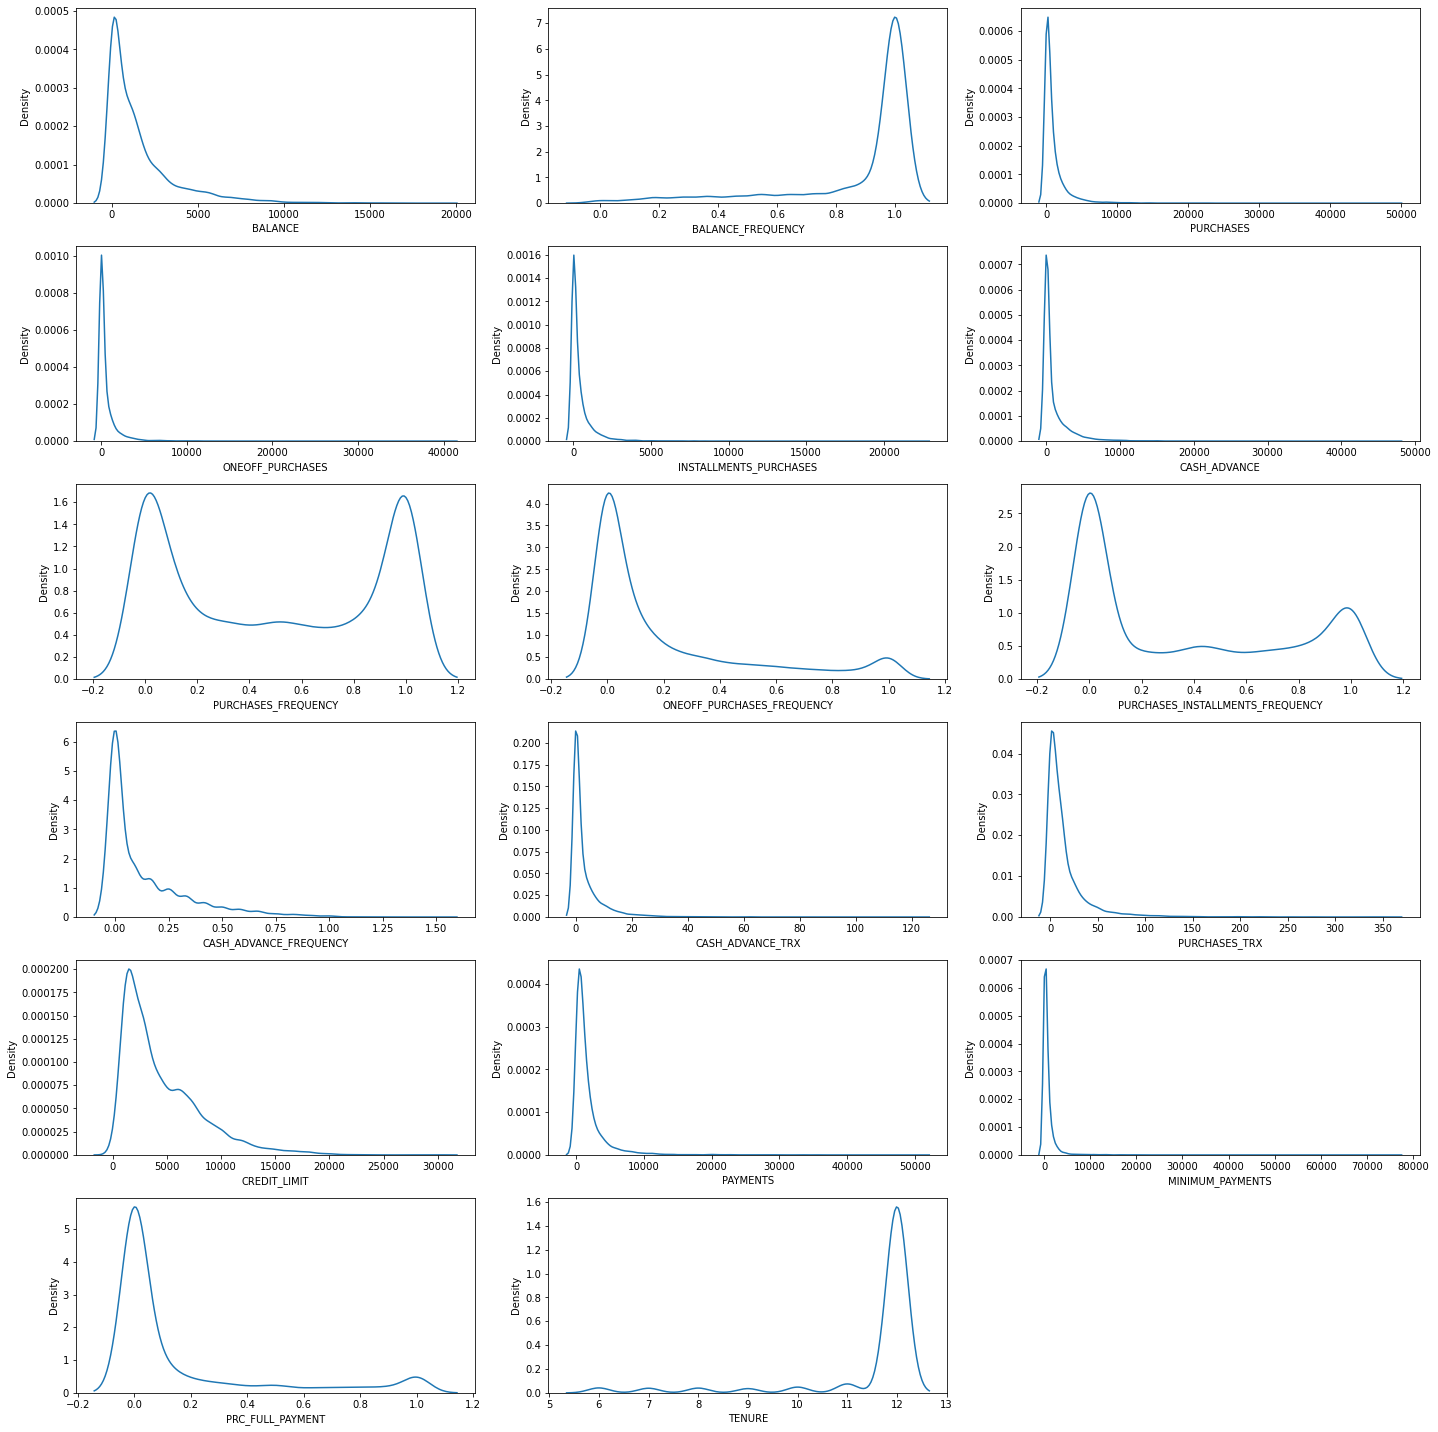

In [68]:
# 분포도
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

plt.figure(figsize=(20, 20))
for i, col in enumerate( df.select_dtypes(include=[np.number]).columns):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=df, x=col, ax=ax)
    plt.xlabel(col)
        
plt.tight_layout()
plt.show()

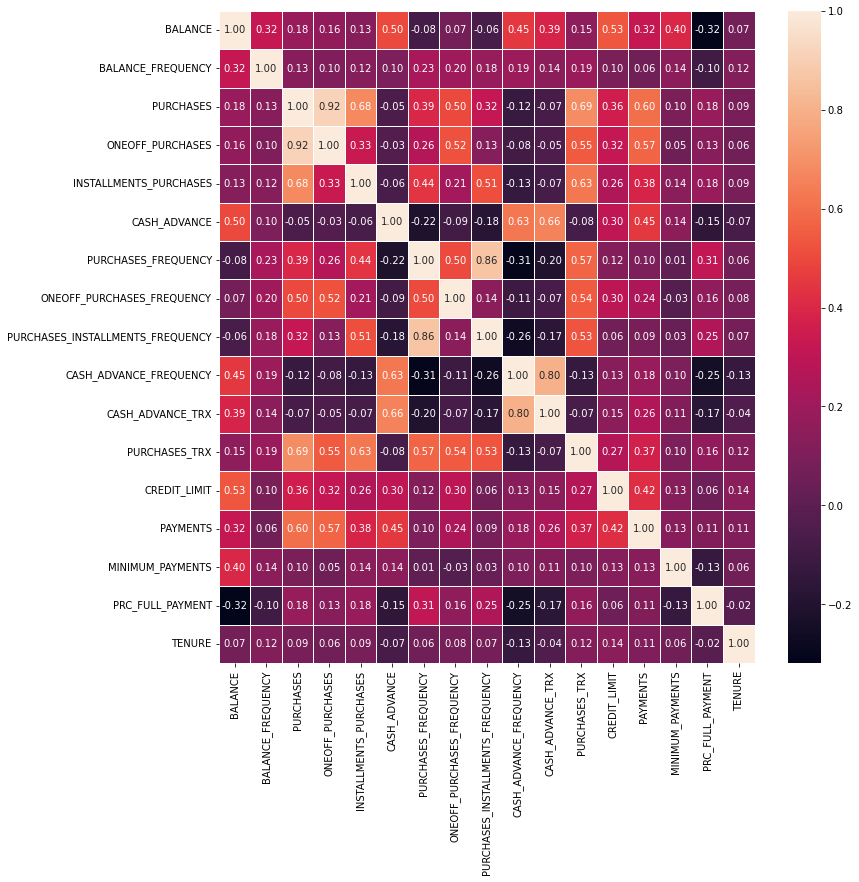

In [73]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

### 1. TENURE 변수

In [39]:
# TENURE
# 신용카드 사용 기간별 비율
x = df.TENURE
pie = x.value_counts()
pie = pie.to_frame()

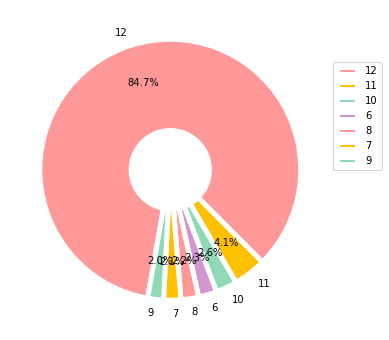

In [40]:
labels = pie.index.to_list()
ratio = pie['TENURE'].to_list()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', ]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize = (10, 6))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, pctdistance=0.7)
plt.legend(loc = (1, 0.5))
plt.show()

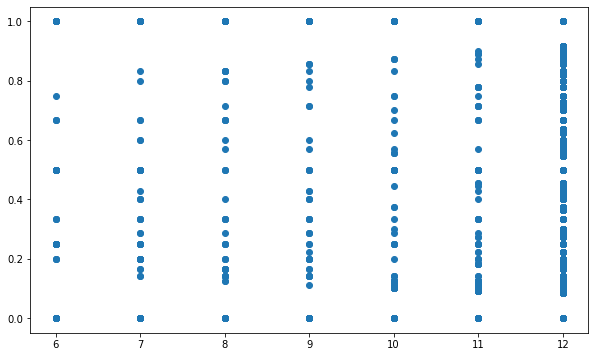

In [42]:
# TENURE & PRC_FULL_PAYMENT 
# 카드 사용 기간이 길수록 지불액의 비율이 높을 것이다. => 카드 사용 기간과 지불액 비율과의 관계는 없음
x = df['TENURE']
y = df['PRC_FULL_PAYMENT']
plt.figure(figsize = (10, 6))
plt.scatter(x, y)

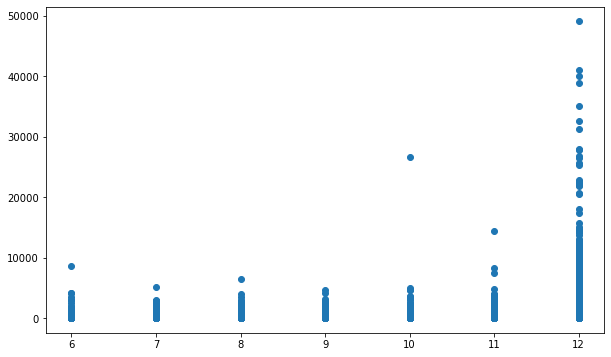

In [43]:
# TENURE & PURCHASES
# 카드 사용 기간이 길수록 지불액이 높을 것이다. => 카드 사용 기간과 지불액 비율의 관계는 없지만 지불액과의 관계는 존재함
x = df['TENURE']
y = df['PURCHASES']
plt.figure(figsize = (10, 6))
plt.scatter(x, y)

In [34]:
# TENURE로 groupby 했을 때
df_T = df.groupby(['TENURE'], as_index=False).mean()
df_T

,TENURE,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,6,1101.198535,0.794745,446.128571,268.231724,178.044631,1444.720814,0.465517,0.142857,0.302956,0.237274,3.866995,5.719212,3002.561576,639.979096,310.027900,0.213547
1,7,1003.800362,0.803759,424.559421,244.051947,180.507474,1295.632053,0.430075,0.123308,0.292481,0.219549,3.700000,5.668421,2567.631579,793.778037,382.845723,0.135363
2,8,1127.963470,0.783163,468.858929,305.398980,163.459949,1361.858390,0.405612,0.140944,0.273597,0.189413,4.096939,6.250000,2973.724490,842.787393,399.758697,0.154094
3,9,1098.752149,0.784127,540.138171,302.211486,239.469543,1470.785130,0.406349,0.109206,0.296508,0.205714,4.582857,6.571429,2977.904762,967.757363,511.864124,0.169778
4,10,1251.955773,0.792373,676.631271,407.238898,269.591525,1303.918006,0.390254,0.141525,0.262712,0.181356,4.076271,7.826271,3871.610169,1127.220569,448.769592,0.169396
5,11,1641.770893,0.870486,571.222411,370.300712,200.921699,1363.252071,0.360399,0.148443,0.231631,0.172105,4.961644,7.857534,4141.232877,1568.695623,949.547582,0.118375
6,12,1619.158166,0.888965,1088.192402,640.490534,448.010364,908.707528,0.506087,0.214300,0.381406,0.124044,3.060390,16.129351,4693.331329,1853.606676,884.498644,0.153426


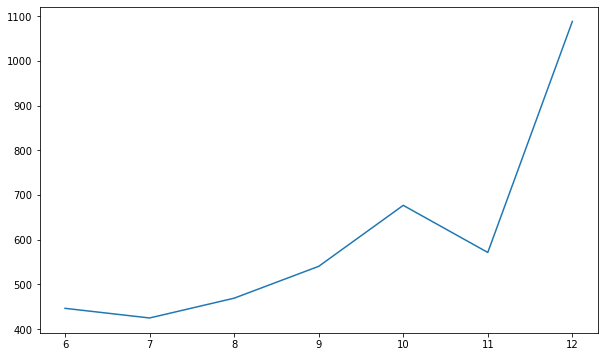

In [37]:
x = df_T['TENURE']
y = df_T['PURCHASES']
plt.figure(figsize = (10, 6))
plt.plot(x, y)

In [49]:
# TENURE & PURCHASES_TRX
# 신용카드 사용 기간이 길수록 구매건수가 많을 것이다
x = df.TENURE
x.value_counts()

12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [50]:
y = df.PURCHASES_TRX
y.value_counts()

0      2043
1       667
12      570
2       379
6       352
       ... 
171       1
168       1
232       1
148       1
186       1
Name: PURCHASES_TRX, Length: 173, dtype: int64

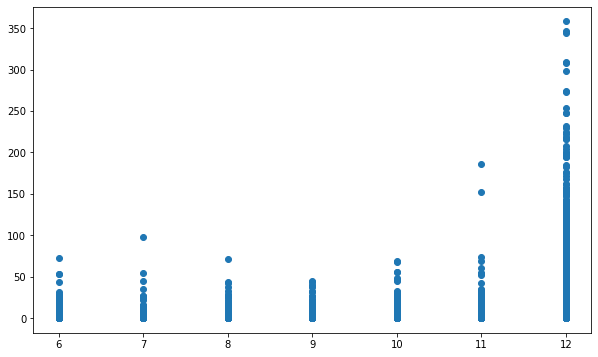

In [51]:
plt.figure(figsize = (10, 6))
plt.scatter(x = df['TENURE'], y = df['PURCHASES_TRX'])

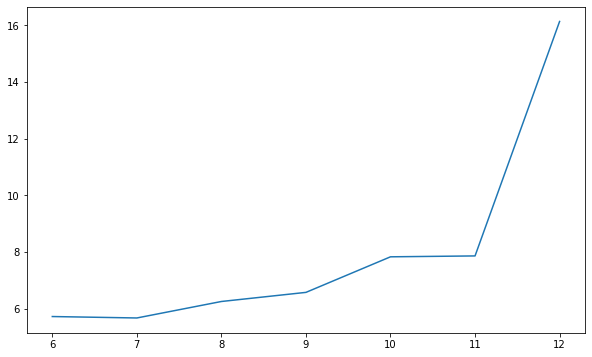

In [54]:
x = df_T['TENURE']
y = df_T['PURCHASES_TRX']
plt.figure(figsize = (10, 6))
plt.plot(x, y)

### 2. BALANCE 변수

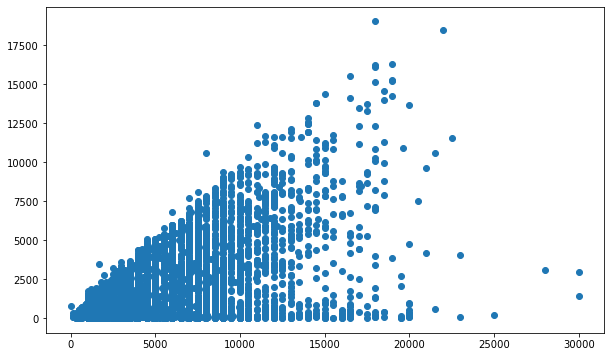

In [13]:
# BALANCE & CREDIT_LIMIT
# 계좌에 돈이 많을수록 신용카드 한도가 높을 것이다 => 우상향
y = df['BALANCE']
x = df['CREDIT_LIMIT']
plt.figure(figsize = (10, 6))
plt.scatter(x, y)

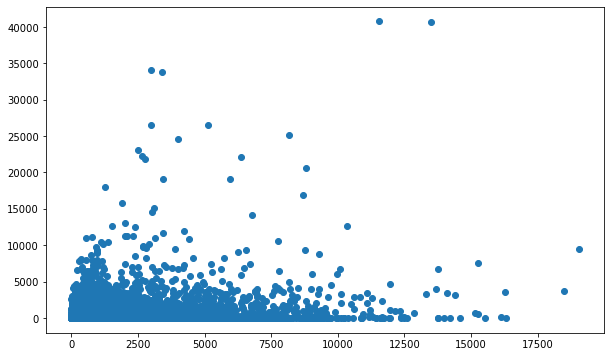

In [44]:
# BALANCE & ONEOFF_PURCHASES 
# 계좌에 돈이 많을수록 한 번에 최대로 결제한 금액이 클 것이다 => 관계 없음
x = df['BALANCE']
y = df['ONEOFF_PURCHASES']
plt.figure(figsize = (10, 6))
plt.scatter(x, y)

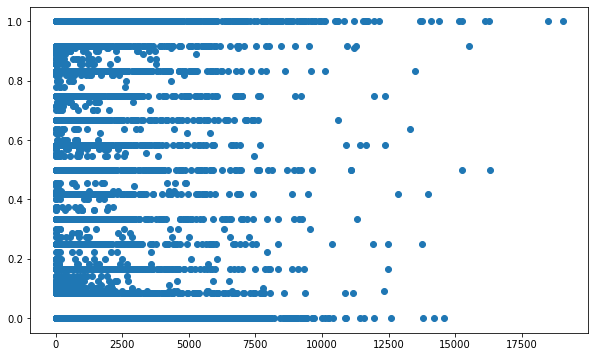

In [82]:
# BALANCE & PURCHASES_FREQUENCY
# 계좌에 돈이 많으면 자주 구매할 것이다.
x = df['BALANCE']
y = df['PURCHASES_FREQUENCY']
plt.figure(figsize = (10, 6))
plt.scatter(x, y)

### 3. CREDIT LIMIT

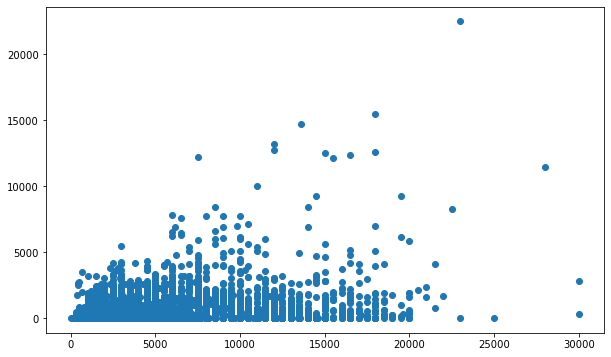

In [28]:
# CREDIT_LIMIT & INSTALLMENTS_PURCHASES
# 한도가 낮으면 할부 금액이 클 것이다 => 상관 없는 듯
plt.figure(figsize = (10, 6))
plt.scatter(x = df['CREDIT_LIMIT'], y = df['INSTALLMENTS_PURCHASES'])

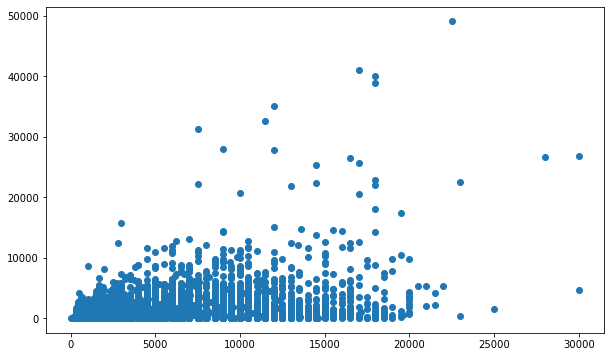

In [55]:
# CREDIT_LIMIT & PURCHASES
# 한도가 낮으면 할부 구매 빈도가 클 것이다 => 상관 없는 듯
plt.figure(figsize = (10, 6))
plt.scatter(x = df['CREDIT_LIMIT'], y = df['PURCHASES'])

### 4. INSTALLMENTS_PURCHASES

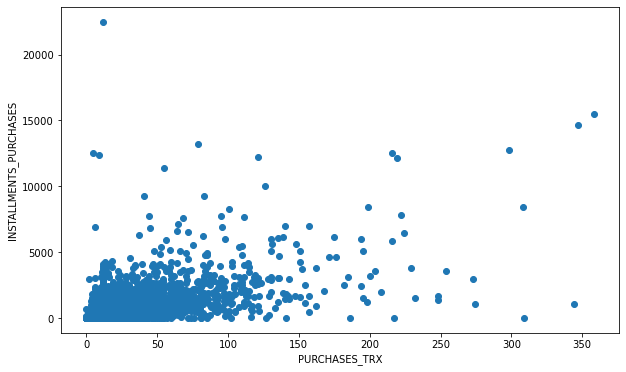

In [77]:
# PURCHASES_TRX & INSTALLMENTS_PURCHASES
# 구매건수가 많으면 할부금액이 많을 것이다
x = df['PURCHASES_TRX']
y = df['INSTALLMENTS_PURCHASES']
plt.figure(figsize = (10, 6))
plt.xlabel('PURCHASES_TRX')
plt.ylabel('INSTALLMENTS_PURCHASES')
plt.scatter(x, y)

### 5. PURCHASES_FREQUENCY

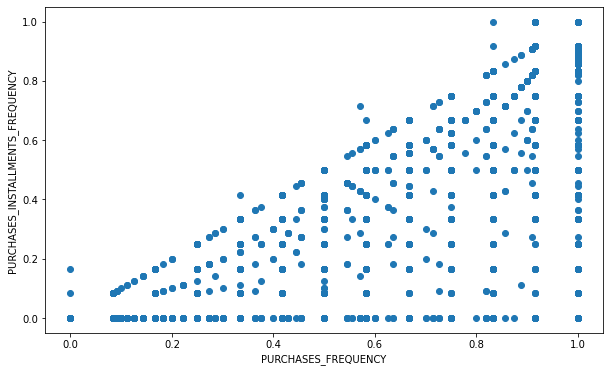

In [80]:
# PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY
# 구매빈도가 높으면 할부구매빈도도 높을 것이다.
y = df['PURCHASES_INSTALLMENTS_FREQUENCY']
x = df['PURCHASES_FREQUENCY']
plt.figure(figsize = (10, 6))
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.xlabel('PURCHASES_FREQUENCY')
plt.scatter(x, y)